## Introduction to Scikit Learn (Sklearn)

What we're going to cover:

0. End-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm ready for the problem
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve a model
6. Save and Load a trained model
7. Putting it all together

In [1]:
what_we_are_covering = [

'0. End-to-end Scikit-Learn workflow',
'1. Getting the data ready',
'2. Choose the right estimator/algorithm ready for the problem',
'3. Fit the model/algorithm and use it to make predictions on our data',
'4. Evaluating the model',
'5. Improve a model',
'6. Save and Load a trained model',
'7. Putting it all together' ]

## 0. End-to-end Scikit-Learn Workflow

In [2]:
# 1. Get the data ready
import pandas as pandas

In [3]:
heart_disease = pandas.read_csv('zero-to-mastery-ml-master/data/heart-disease.csv')

In [4]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Create Feature matrix
X = heart_disease.drop('target', axis = 1)

# Create Y Axis
Y = heart_disease['target']

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

randomClassifier = RandomForestClassifier()

# We'll keep the default hyper parameters
randomClassifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
randomClassifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
# Make the prediction
y_preds = randomClassifier.predict(X_test)

In [9]:
# 4. Evaluate the model on the training and testing data
randomClassifier.score(X_train, Y_train)

1.0

In [10]:
randomClassifier.score(X_test, Y_test)

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.89      0.80      0.84        40

    accuracy                           0.80        61
   macro avg       0.78      0.80      0.79        61
weighted avg       0.82      0.80      0.81        61



In [12]:
confusion_matrix(Y_test, y_preds)

array([[17,  4],
       [ 8, 32]], dtype=int64)

In [13]:
accuracy_score(Y_test, y_preds)

0.8032786885245902

In [4]:
import numpy as numpy

In [15]:
# 5. Improve a model

# Try different values on `n_estimators`

numpy.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators..')
    randomClassifier = RandomForestClassifier(n_estimators = i).fit(X_train, Y_train)
    print(f'Model accuracy on test set: {randomClassifier.score(X_test, Y_test)*100:.2f}%')
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 80.33%

Trying model with 20 estimators..
Model accuracy on test set: 80.33%

Trying model with 30 estimators..
Model accuracy on test set: 81.97%

Trying model with 40 estimators..
Model accuracy on test set: 78.69%

Trying model with 50 estimators..
Model accuracy on test set: 81.97%

Trying model with 60 estimators..
Model accuracy on test set: 81.97%

Trying model with 70 estimators..
Model accuracy on test set: 81.97%

Trying model with 80 estimators..
Model accuracy on test set: 80.33%

Trying model with 90 estimators..
Model accuracy on test set: 81.97%



### we see that n_estimators = 20 value gives the same result.. so, we can use that. 

In [16]:
# 6. Save a model and load it
import pickle

pickle.dump(randomClassifier, open('random_forest_model_SELF1.pkl', 'wb'))

In [17]:
loaded_model = pickle.load(open('random_forest_model_SELF1.pkl', 'rb'))
loaded_model.score(X_test, Y_test)

0.819672131147541

### `loaded_model` will load the last loaded model.. so, `n_estimators = 90` score of `77%` is shown..

In [ ]:
#import warnings
#warnings.filterwarnings('default')

In [29]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
executable: E:\Anaconda3\python.exe
   machine: Windows-10-10.0.18362-SP0

BLAS:
    macros: 
  lib_dirs: 
cblas_libs: cblas

Python deps:
       pip: 19.1.1
setuptools: 41.0.1
   sklearn: 0.21.2
     numpy: 1.16.4
     scipy: 1.2.1
    Cython: 0.29.12
    pandas: 0.24.2


In [6]:
what_we_are_covering

['0. End-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm ready for the problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6. Save and Load a trained model',
 '7. Putting it all together']

## 1. Getting the data ready to be used with Machine Learning

Three main things we have to do:
    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called as imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called as feature encoding)

In [4]:
# Standard Imports
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as pyplot
%matplotlib inline

from sklearn.model_selection import train_test_split

In [13]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop('target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X_train.shape, X_train.shape, y_train.shape, y_test.shape

((242, 13), (242, 13), (242,), (61,))

In [18]:
X.shape

(303, 13)

In [19]:
303 * 0.8

242.4

###       1.1 Make data Numerical

In [23]:
car_sales = pandas.read_csv('zero-to-mastery-ml-master/data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
car_sales.shape

(1000, 5)

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
car_sales['Doors'].value_counts() # Categorical Field.. not numerical

4    856
5     79
3     65
Name: Doors, dtype: int64

In [27]:
# Split into X/y

X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# Split into Train|Test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
# Build out Machine Learning Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

### Option 1: Turning Categorical variables to Numeric using Scikit-Learn

In [29]:
# Turning the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)

In [30]:
df = pandas.DataFrame(transformed_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [31]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [36]:
df.shape

(1000, 13)

### Option 2: Turning Categorical variables to Numeric using Pandas

In [32]:
# Another way of doing Encoding

dummies = pandas.get_dummies(car_sales[['Make', 'Colour', 'Doors']]) # Beware of the double [] brackets here!!
dummies.head() # this wouldn't turn the 'Doors' column though

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [34]:
# Let's refit the model

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
model.score(X_test, y_test)

0.2330485230539474

### 1.2 What if there are missing values?

1. Fill them with some values (a.k.a. imputation)
2. Remove the rows/columns with missing data altogether

In [54]:
# Import the missing dataset

car_sales_missing = pandas.read_csv('zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Option 1: Fill missing data with pandas

In [56]:
# Split it into X/y

X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [57]:
# Turning the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)

ValueError: Input contains NaN

In [58]:
# Fill in the missing values

car_sales_missing['Make'].fillna('missing', inplace=True)

car_sales_missing['Colour'].fillna('missing', inplace = True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

car_sales_missing['Doors'].fillna(4, inplace = True) # since, 4 is the Mode of this variable column..

In [59]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [60]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [61]:
# Remove the rows which has Missing values in Price column

car_sales_missing.dropna(inplace = True)

In [62]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
car_sales_missing.shape

(950, 5)

In [63]:
# Split the data again in X/y

X = car_sales_missing.drop('Price', axis = 1)

y = car_sales_missing['Price']

In [64]:
# One Hot Encoding

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)

In [65]:
# Building the model..

numpy.random.seed(20)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2255244730243875

### Option 2: Filling missing data with scikit-learn

In [45]:
car_sales_missing = pandas.read_csv('zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Dropping the rows with no data in 'Price' column

car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
# Split the data into X/y

X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [49]:
# Filling in missing vaues using scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical variables with 'Missing' and numerical with mean

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

# Define columns

cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills in the missing data)

imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features),
                            ('door_imputer', door_imputer, door_features),
                            ('num_imputer', num_imputer, num_features)])

# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [50]:
car_sales_filled = pandas.DataFrame(filled_X, columns = ['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [51]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
# One Hot Encoding

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)

In [53]:
# Now that our data has no-missing values and numeric in nature, we can build our model

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

numpy.random.seed(20)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2255244730243875

### 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses the term estimator as another name for ML algorithm or model.

* Classification
* Regression

#### 2.1. Picking a Machine Learning model for Regression sample

In [26]:
# Import the Boston dataset

from sklearn.datasets import load_boston
bost = load_boston()

In [27]:
boston = pandas.DataFrame(data = bost['data'], columns = bost['feature_names'])
boston['target'] = pandas.Series(bost['target'])

In [28]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# How many samples?
len(boston)

506

In [10]:
# Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
numpy.random.seed(24)

# Create the Data
X = boston.drop('target', axis = 1)
y = boston['target']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the Ridge Model
model = Ridge()
model.fit(X_train, y_train)

# Score the Model on the test dataset
model.score(X_test, y_test)

0.6396793344552989

* How do we improve this score?

* What if Ridge isn't working?

In [12]:
# Let's try Random Forest Regressor [Reason being, it is one of the Ensemble techniques: a WAR HORSE]
from sklearn.ensemble import RandomForestRegressor

# Since, we've already declared the variables, and split them, let's build the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Score the model on the test dataset
rf.score(X_test, y_test)

0.8090318492911783

#### Above seen is the kind of improvement in scores that we see in Ensemble Models

#### SELF LEARN: Heart Disease Problem

In [4]:
heart_disease.shape

(303, 14)

In [5]:
heart_disease.info() # All Columns basic information summary...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease.isna().sum() # No Null values...

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_disease.describe() # Summary of all the Numeric Columns, which in this case is all the columns.. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_disease['target'].count # Target Column has two Categories : 0's and 1's

<bound method Series.count of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [9]:
from sklearn.svm import LinearSVC

In [19]:
# Preparing the data

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Building the Model of LinearSVC (recomended as per the map)
clf = LinearSVC(max_iter = 100000)
clf.fit(X_train, y_train)

# Scoring the Model
clf.score(X_test, y_test)

C:\Users\RANJA\OneDrive\Documents\BABI\Jupyter Lab Files\ZTM\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8852459016393442

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Trying RandomForest Classifier on the same dataset

# Preparing the data

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Building the Model of RandomForest Classifier (recomended as per the map)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Scoring the Model
clf.score(X_test, y_test)

0.7704918032786885

In the course, LinearSVC() model had 45% ish accuracy. But, we got 80% > accuracy. 

They got higher Accuraacy in RandomForestClassifier() which wasn't the case for us. 

Helpful Tip: 
    * When with structured data: use Ensemble Techniques.
    * When with unstructured data: use deep learning or transfer learning.

### 3. Fit the model/algorithm on our data and make predictions

#### 3.1 Fitting to the model to the data

Different names for:
* `X` = feature, feature labels, data
* `y` = target, target variables, labels

In [32]:
# Trying RandomForest Classifier on the same dataset

# Preparing the data

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Building the Model of RandomForest Classifier (recomended as per the map)
clf = RandomForestClassifier()

# Fit the model to the data (training the ML model)
clf.fit(X_train, y_train)

# Scoring the Model (use the patterns the model has learned)
clf.score(X_test, y_test)

0.819672131147541

#### 3.2 Make predictions

Two ways to do it:
1. `predict()`
2. `predict_proba()`

In [20]:
clf.predict(numpy.array([1, 3, 5, 7])) # this won't work!

ValueError: Expected 2D array, got 1D array instead:
array=[1 3 5 7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2


In [33]:
clf.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [34]:
numpy.array(y_test)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [35]:
# Compare predictions to Truth labels to evaluate the model

y_preds = clf.predict(X_test)
numpy.mean(y_preds == y_test)

0.819672131147541

In [26]:
clf.score(X_test, y_test)

0.8852459016393442

In [27]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_preds)

0.819672131147541

Make predictions with `predict_proba()`

#### LinearSVC() doesn't have `predict_proba()`

In [38]:
# Make Predictions using probablity of the label occurrence
clf.predict_proba(X_test[:5])

array([[0.72, 0.28],
       [0.95, 0.05],
       [0.24, 0.76],
       [0.05, 0.95],
       [0.07, 0.93]])

In [39]:
y_preds[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [41]:
clf.predict(X_test[:5])

array([0, 0, 1, 1, 1], dtype=int64)

In [43]:
numpy.array(y_test[:5])

array([0, 0, 1, 1, 1], dtype=int64)

`predict()` works with Regression Models too

In [48]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
from sklearn.ensemble import RandomForestRegressor

numpy.random.seed(24)

# Create the Dataset

X = boston.drop('target', axis = 1)
y = boston['target']

# Split the Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the RandomForestRegressor() model

reg = RandomForestRegressor().fit(X_train, y_train)

# Predict using the Model

y_preds = reg.predict(X_test)

In [54]:
y_preds[:10]

array([35.971, 19.497, 21.323, 19.36 , 27.208, 34.62 , 19.459, 16.453,
       16.462, 35.286])

In [55]:
numpy.array(y_test[:10])

array([50. , 19.5, 20.7, 19.3, 24.1, 34.9, 23.1, 17.4, 13.2, 33.4])

In [56]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.614696078431374

### 4. Evaluating a machine learning model

Three ways to evaluate scikit-learn models/estimators:
1. Estimator `score` method
2. The `score` parameter
3. Problem specific metric functions

#### 4.1 Evaluating a model using `score` method

In [57]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
from sklearn.ensemble import RandomForestClassifier

numpy.random.seed(20)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier().fit(X_train, y_train)

In [60]:
model.score(X_test, y_test) #Since this is classification, it is showing the Accuracy

0.7540983606557377

Now for Regression

In [61]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
from sklearn.ensemble import RandomForestRegressor

numpy.random.seed(24)

# Create the Dataset

X = boston.drop('target', axis = 1)
y = boston['target']

# Split the Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the RandomForestRegressor() model

reg = RandomForestRegressor().fit(X_train, y_train)

In [63]:
reg.score(X_test, y_test) # Returns the r^2 since it is Regression model..

0.8090318492911783

#### 4.2 Evaluate the model using the `scoring` parameter

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
from sklearn.ensemble import RandomForestClassifier

numpy.random.seed(20)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier().fit(X_train, y_train)

In [67]:
model.score(X_test, y_test)

0.7540983606557377

In [68]:
cross_val_score(model, X, y)

array([0.80327869, 0.8852459 , 0.78688525, 0.81666667, 0.76666667])

In [70]:
numpy.random.seed(20)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = numpy.mean(cross_val_score(model, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.9672131147540983, 0.8248087431693989)

In [71]:
cross_val_score(model, X, y, cv = 10, scoring = None)

array([0.87096774, 0.83870968, 0.87096774, 0.93333333, 0.9       ,
       0.76666667, 0.73333333, 0.83333333, 0.73333333, 0.8       ])

#### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

**Accuracy**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

numpy.random.seed(20)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

cvs = cross_val_score(clf, X, y)

In [75]:
numpy.mean(cvs)

0.8248087431693989

#### ** Area under the receiver operating characteristic curve (AUC/ROC) **

* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparision of a model's True Positive versus a model's False Positive rate.

In [7]:
# Create X_test... etc
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2)

In [8]:
from sklearn.metrics import roc_curve

# Fit the Classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.01, 0.99],
       [0.58, 0.42],
       [0.57, 0.43],
       [0.96, 0.04],
       [0.31, 0.69],
       [0.14, 0.86],
       [0.8 , 0.2 ],
       [0.42, 0.58],
       [0.74, 0.26],
       [0.04, 0.96]])

In [9]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.99, 0.42, 0.43, 0.04, 0.69, 0.86, 0.2 , 0.58, 0.26, 0.96])

In [10]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the False Positive Rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.03846154, 0.11538462, 0.15384615,
       0.15384615, 0.23076923, 0.23076923, 0.26923077, 0.26923077,
       0.30769231, 0.38461538, 0.46153846, 1.        ])

Let's plot this ROC & AUC for better understanding!

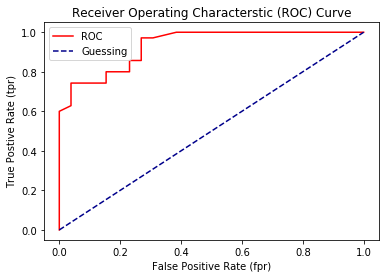

In [11]:
# Create a custom-made function for plotting ROC curves
import matplotlib.pyplot as pyplot

def plot_roc_curve (fpr, tpr):
    """
    Plots a ORC curve given the false positive rate (fpr) and trye positive rate (tpr) of a model.
    """
    
    # Plot ROC curve
    pyplot.plot(fpr, tpr, color = 'red', label = 'ROC')
    
    # Plot line with no predictive power (baseline)
    pyplot.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the plot
    pyplot.xlabel('False Positive Rate (fpr)')
    pyplot.ylabel('True Postive Rate (tpr)')
    pyplot.title('Receiver Operating Characterstic (ROC) Curve')
    pyplot.legend()
    pyplot.show()
    
plot_roc_curve(fpr, tpr)

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9324175824175824

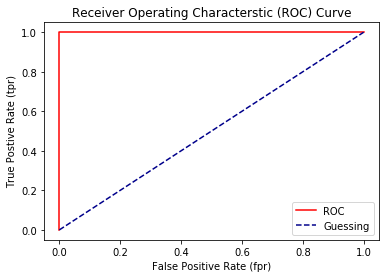

In [13]:
# Plot perfect ROC curve and AUC curve score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [16]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model preducts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused. 

In [14]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[18,  8],
       [ 1, 34]], dtype=int64)

In [19]:
# Visualize confusion matrix with .crosstab()

pandas.crosstab(y_test, y_preds, rownames = ['Actual Labels'], colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,18,8
1,1,34


While setting up our conda env, we haven't downloaded or installed seaborn package. Hence, doing it through the Notebook~!

In [15]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\RANJA\OneDrive\Documents\BABI\JupyterLabFiles\ZTM\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py38_0         156 KB
    seaborn-0.10.0             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         319 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.0-py_0

The following packages will be UPDATED:

  certifi                                 2019.11.28-py38_1 --> 2020.4.5.1-py38_0




seaborn-0.10.0       | 163 KB    |            |   0% 
seaborn-0.10.0       | 163 KB    | 9          |  10% 
seaborn-0.10.0       | 163 KB    | ########## | 100% 

certifi-



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




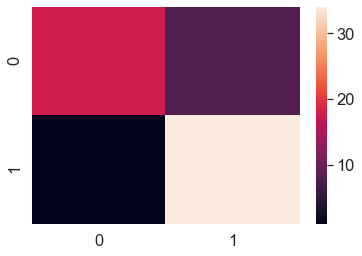

In [16]:
# Make another Visualization with seaborn's heatmap()

import seaborn

# Set the font scale 
seaborn.set(font_scale= 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
seaborn.heatmap(conf_mat)

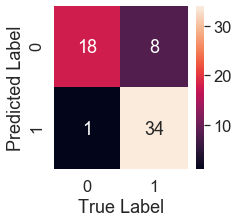

In [17]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = pyplot.subplots(figsize = (3,3))
    ax = seaborn.heatmap(conf_mat, annot=True, cbar = 'False') # Annotate the boxes with conf_mat info
    
    # Customize
    pyplot.xlabel('True Label')
    pyplot.ylabel('Predicted Label');
    
plot_conf_mat(conf_mat)
    

In [19]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.1.3


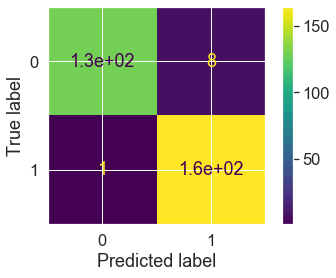

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

**Classification Report**

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80        26
           1       0.81      0.97      0.88        35

    accuracy                           0.85        61
   macro avg       0.88      0.83      0.84        61
weighted avg       0.87      0.85      0.85        61



In [24]:
# Where Precision and Recall become valuable

disease_true = numpy.zeros(10000)

disease_true[0] = 1 # Only 1 positive case

disease_preds = numpy.zeros(10000) # model predicts every case as 0

pandas.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

C:\Users\RANJA\OneDrive\Documents\BABI\JupyterLabFiles\ZTM\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To Summarize **Classification Metrics**:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If False Positive predictions are worse than False Negatives, aim for Higher Precision.
* If False Negative predictions are worse than False Positives, aim for Higher Recall.
* **F1-score** is a combination of Precision and Recall.

### 4.2.2 Regression Model Evaluation Metrics

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

1. r^2 or coefficient of determination.
2. Mean Absolute Error (MAE).
3. Mean Squared Error (MSE).

**r^2**

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 

For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And, if your model perfectly predicts a range of numbers, it's R^2 value would be 1. 

In [29]:
from sklearn.ensemble import RandomForestRegressor

numpy.random.seed(20)

X = boston.drop('target', axis = 1)
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [30]:
model.score(X_test, y_test)

0.7944758005013088

In [31]:
from sklearn.metrics import r2_score

# Fil an array with y_test mean

y_test_mean = numpy.full(len(y_test), y_test.mean())

In [32]:
y_test_mean[:5]

array([21.61862745, 21.61862745, 21.61862745, 21.61862745, 21.61862745])

In [33]:
r2_score(y_test, y_test_mean)

0.0

In [34]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**

Average of the absolute differences between predictions and actual values. 

It gives an idea of how wrong you are. 

In [36]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.400401960784313

In [37]:
df = pandas.DataFrame(data= {'Actual Values': y_test, 'Predicted Values' : y_preds})

In [38]:
df

,Actual Values,Predicted Values
498,21.2,21.504
94,20.6,21.569
150,21.5,19.220
221,21.7,19.396
423,13.4,12.992
...,...,...
9,18.9,20.544
449,13.0,14.447
359,22.6,20.800
106,19.5,17.915


In [39]:
df['differences'] = df['Predicted Values'] - df['Actual Values']
df[:10]

,Actual Values,Predicted Values,differences
498,21.2,21.504,0.304
94,20.6,21.569,0.969
150,21.5,19.220,-2.280
221,21.7,19.396,-2.304
423,13.4,12.992,-0.408
13,20.4,21.064,0.664
209,20.0,18.673,-1.327
398,5.0,7.147,2.147
31,14.5,19.506,5.006
235,24.0,23.048,-0.952


**Mean Squared Error (MSE)**

In [40]:
# Mean squared error

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

13.236875950980385

**MSE is always > MAE**

In [43]:
# Calculate MSE by hand

sq = numpy.square(df['differences'])
sq.mean()

13.236875950980385

### 4.23 Finally using the `scoring` parameter

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

numpy.random.seed(20)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [47]:
numpy.random.seed(20)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
cv_acc

array([0.81967213, 0.91803279, 0.81967213, 0.8       , 0.76666667])

In [48]:
# Cross-validated accuracy
print(f'The corss-validated accuracy is : {numpy.mean(cv_acc) * 100: .2f}%')

The corss-validated accuracy is :  82.48%


In [49]:
numpy.random.seed(20)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
print(f'The cross-validated accuracy is : {numpy.mean(cv_acc) * 100: .2f}%')

The cross-validated accuracy is :  82.48%


In [50]:
# Precision
numpy.random.seed(20)
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
numpy.mean(cv_precision)

0.8296738310708898

In [51]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
numpy.mean(cv_recall)

0.8424242424242424

In [52]:
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
numpy.mean(cv_f1)

0.8454569183278577

How about our regression models?

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

numpy.random.seed(20)

X = boston.drop('target', axis = 1)
y = boston['target']

model = RandomForestRegressor()

In [54]:
numpy.random.seed(20)
#model.fit()
cv_r2 = cross_val_score(model, X, y, cv = 5, scoring = None)
cv_r2

array([0.76481775, 0.86261381, 0.73163228, 0.48103886, 0.24197056])

In [57]:
numpy.random.seed(20)
cv_r2 = cross_val_score(model, X, y, cv = 5, scoring = "r2")
cv_r2

array([0.76481775, 0.86261381, 0.73163228, 0.48103886, 0.24197056])

In [59]:
# Mean Absolute Error
cv_mae = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
cv_mae

array([-2.08357843, -2.61990099, -3.3630099 , -3.71240594, -3.18627723])

In [60]:
# Mean Squared Error
cv_mse = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error')
cv_mse

array([ -7.25957438, -13.02432724, -23.9076603 , -46.82927832,
       -17.73587565])

In [61]:
numpy.mean(cv_mse)

-21.751343177460676

### 4.3 Using different evaluation metrics as scikit-learn functions

**Classification Evaluation Functions**

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

numpy.random.seed(20)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

# Make some predictions

y_preds = clf.predict(X_test)

# Evaluate the Classifier

print('Classifier metrics on the test set')
print(f'Accuracy : {accuracy_score(y_test, y_preds) * 100: .2f}%')
print(f'Precision : {precision_score(y_test, y_preds) * 100: .2f}%')
print(f'Recall : {recall_score(y_test, y_preds) * 100: .2f}%')
print(f'F1-score : {f1_score(y_test, y_preds) * 100: .2f}%')

Classifier metrics on the test set
Accuracy :  75.41%
Precision :  82.86%
Recall :  76.32%
F1-score :  79.45%


**Regression Evaluation Functions**

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

numpy.random.seed(20)

X = boston.drop('target', axis = 1)
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

# Make Predictiosn using our regression model

y_preds = model.predict(X_test)

# Evaluate the regression model

print("Regression model metrics on the test set")
print(f'r^2 : {r2_score(y_test, y_preds) * 100 : .2f}%')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_preds)}')
print(f'Mean Squared Error : {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
r^2 :  79.45%
Mean Absolute Error : 2.400401960784313
Mean Squared Error : 13.236875950980385


In [66]:
what_we_are_covering

['0. End-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm ready for the problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6. Save and Load a trained model',
 '7. Putting it all together']

## 5. Improving a Model

* First predictions = baseline predictions.
* First models = baseline model.

From a data perspective:
* Could we collect more data? (generaly, the more data, the better)
* Could we improve our data?

From model perspective:
* Is there a better model we could use?
* Can you improve the current model?

Parameters V/S Hyperparameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust Hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [68]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

Let's make 3 sets : training, validation and test

We're going to try and adjust: 

* `max_depth`
* `min_samples_leaf`
* `max_features`
* `min_samples_split`
* `n_estimators`

In [83]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels. 
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {'accuracy' : round(accuracy, 2),
                  'precision' : round(precision, 2),
                  'recall' : round(recall, 2),
                  'f1' : round(f1, 2)}
    
    print(f'Accuracy : {accuracy * 100 : .2f}%')
    print(f'Precision : {precision : .2f}')
    print(f'Recall : {recall : .2f}')
    print(f'F1 score : {f1 : .2f}')
    
    return metric_dict

In [84]:
from sklearn.ensemble import RandomForestClassifier

numpy.random.seed(20)

# Shuffle the data

heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X & y

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets

train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split : valid_split], y[train_split : valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make Predictions

y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy :  86.67%
Precision :  0.88
Recall :  0.88
F1 score :  0.88


{'accuracy': 0.87, 'precision': 0.88, 'recall': 0.88, 'f1': 0.88}

**`n_estimators`**

In [85]:
numpy.random.seed(20)

# Create a second classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators = 200)
clf_2.fit(X_train, y_train)

# Make Predictions with different hyperparameters, same data

y_preds_2 = clf_2.predict(X_valid)
    
# Evaluate the 2nd Classifier

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy :  86.67%
Precision :  0.88
Recall :  0.88
F1 score :  0.88


**`max_depth`**

In [87]:
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth = 10)

clf_3.fit(X_train, y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy :  86.67%
Precision :  0.88
Recall :  0.88
F1 score :  0.88


### 5.2 Hyperparameter tuning with `RandomizeSearchCV`

In [90]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators' : [10, 100, 200, 500 ,1000, 1200], 
       'max_depth' : [None, 5, 10, 20, 30],
       'max_features' : ['auto', 'sqrt'],
       'min_samples_split' : [2, 4, 6],
       'min_samples_leaf' : [1, 2, 4]}

numpy.random.seed(20)

# Split into X & y

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid, 
                            n_iter = 10, # no of models to try
                            cv = 5,
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_featur

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   55.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [92]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [94]:
# Now when we call .predict(), it will call the best hyperparameters fit

rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy :  88.52%
Precision :  0.86
Recall :  0.94
F1 score :  0.90


### 5.3 Hyperparameter tuning using `GridSearchCV`

In [96]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [20, 40],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [4, 6],
         'min_samples_leaf': [2, 4]}

In [98]:
from sklearn.model_selection import GridSearchCV, train_test_split

numpy.random.seed(20)

# Split into X & y

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV

gs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid_2, 
                            cv = 5,
                            verbose = 2)

# Fit the GridSearchCV version of clf

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=500, min_samples_split=4, min_samp

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [99]:
gs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40}

In [100]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy :  88.52%
Precision :  0.86
Recall :  0.94
F1 score :  0.90


In [101]:
rs_metrics

{'accuracy': 0.89, 'precision': 0.86, 'recall': 0.94, 'f1': 0.9}

Let's compare our different models metrics.

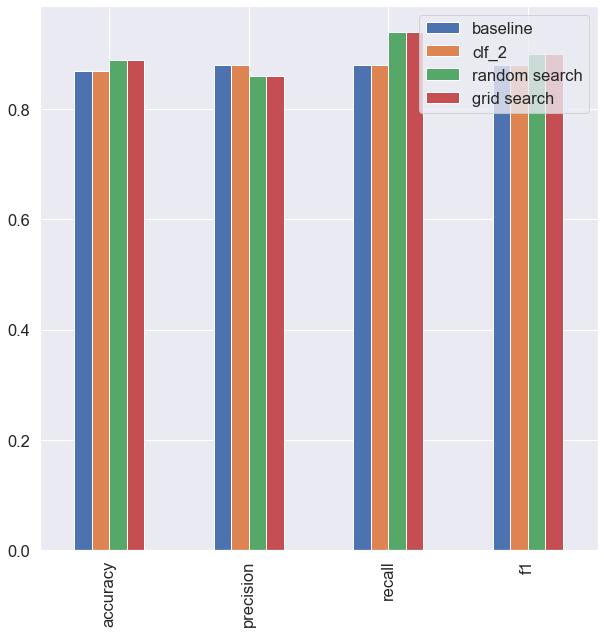

In [105]:
compare_metrics = pandas.DataFrame({'baseline' : baseline_metrics,
                                  'clf_2' : clf_2_metrics,
                                  'random search' : rs_metrics,
                                  'grid search' : gs_metrics})

compare_metrics.plot.bar(figsize = (10, 10));

## 6. Saving and loading a trained Machine Learning Models

Two ways to save and load ML models:
1. Python's `Pickle` model
2. `joblib` module

In [106]:
import pickle

# save an existing model to file

pickle.dump(gs_clf, open('gs_RandomForest_model_1.pkl', 'wb'))

In [107]:
# Load a saved model

loaded_pickle_model = pickle.load(open('gs_RandomForest_model_1.pkl', 'rb'))

In [108]:
# Make some predictions to check it

pickle_y_preds = loaded_pickle_model.predict(X_test)

In [109]:
evaluate_preds(y_test, pickle_y_preds)

Accuracy :  88.52%
Precision :  0.86
Recall :  0.94
F1 score :  0.90


{'accuracy': 0.89, 'precision': 0.86, 'recall': 0.94, 'f1': 0.9}

**Joblib**

In [110]:
from joblib import dump, load

# Save model to file

dump(gs_clf, filename = 'gs_RandomFores_model_1.joblib')

['gs_RandomFores_model_1.joblib']

In [111]:
# Import a saved joblib model

loaded_job_model = load(filename = 'gs_RandomFores_model_1.joblib')

In [112]:
# Make predictions and evaluate joblib predictions

joblib_y_preds = loaded_job_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy :  88.52%
Precision :  0.86
Recall :  0.94
F1 score :  0.90


{'accuracy': 0.89, 'precision': 0.86, 'recall': 0.94, 'f1': 0.9}

## 7. Putting it all together!

In [113]:
data = pandas.read_csv('zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv')

In [114]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [115]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [116]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [118]:
data['Colour'].value_counts()

White    390
Blue     302
Black     95
Red       88
Green     75
Name: Colour, dtype: int64

Steps we want to do (all in one cell):


1. Fill Missing data
2. Convert data to numbers
3. Build a model on the data

In [2]:
# Getting data ready
import pandas
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup Random seed
import numpy
numpy.random.seed(20)

# Import data and drop rows with missing labels
data = pandas.read_csv('zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace = True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

door_feature = ['Doors']
door_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                transformers = [
                    ('cat', categorical_transformer, categorical_features),
                    ('door', door_transformer, door_feature),
                    ('num', numeric_transformer, numeric_features)
                ])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split Data
X = data.drop('Price', axis = 1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.20217468942826355

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [4]:
# Use GridSearchCV with our Regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy" : ['mean', 'median'],
    "model__n_estimators" : [100, 1000],
    "model__max_depth" : [None, 5],
    "model__max_features" : ['auto'],
    "model__min_samples_split" : [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   3.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [5]:
gs_model.score(X_test, y_test)

0.3375859859933375